# Ojus Sharma

## Research question/interests
**Who is best Wicket-Keeper in IPL History?** \
**Who are the top batting based and bowling based all-rounders in IPL History?** 

Selecting the top 11 players from the Indian Premier League (IPL) is a challenging task, considering the vast talent pool and individual performances across the 14 seasons. 
As an MS Dhoni fan, I am interested in finding the best wicket-keeper in IPL history. Further, I want to find the top 2 all-rounders in the IPL. Given the extensive database we have at hand, we wil calculate the of player statistics, including batting and bowling averages, strike rates, wicket-taking ability, playoff performance and other integral statistics. This data will be stored and processed in a separate file. I aim to use statistical analysis tools such as regression, correlation, and clustering to identify patterns and trends in the data. This would allow me to create a ranking system that factors in both individual and team performance, as well as the unique challenges and conditions of the IPL. Based on this analysis, I would identify the two best all-rounders and one wicketkeeper, taking into account factors such as consistency, reliability, and impact on the game.

In [15]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#FINDING UNIQUE KEEPERS IN IPL HISTORY
unique_stumpers = pf3.find_unique_wicketkeepers(ball_by_ball)
unique_stumpers

#FINDING ALL WICKETKEEPER STATISTCS
final_wicketkeeping_stats = pf3.find_wicketkeeper_stats(ball_by_ball, unique_stumpers)
final_wicketkeeping_stats

,Catches,Stumpings,Innings,Dismissals,Dis/Inn
fielders_involved,,,,,
H Klaasen,4,4,4,8,2.00
Kamran Akmal,5,4,5,9,1.80
SP Jackson,7,2,5,9,1.80
Q de Kock,65,15,47,80,1.70
KS Bharat,4,1,3,5,1.67
M Rawat,16,2,11,18,1.64
JM Sharma,9,2,7,11,1.57
RR Pant,64,18,55,82,1.49
AC Gilchrist,51,16,45,67,1.49


In [19]:
w = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats).reset_index().drop(columns=["index"])
w.to_csv("../data/processed/Wicketkeeping_stats.csv")
w

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket
0,AB de Villiers,120,8,99,128,1.29,148.58,41.45
1,AC Gilchrist,51,16,45,67,1.49,133.05,27.22
2,AT Rayudu,62,2,61,64,1.05,124.15,29.51
3,BB McCullum,38,6,39,44,1.13,126.85,27.19
4,Ishan Kishan,33,2,25,35,1.40,129.50,30.16
5,JC Buttler,43,1,33,44,1.33,144.86,39.89
6,JM Bairstow,20,4,17,24,1.41,138.07,33.97
7,KC Sangakkara,45,9,37,54,1.46,118.47,24.45
8,KD Karthik,133,34,123,167,1.36,129.27,26.05
9,KL Rahul,59,5,53,64,1.21,132.80,46.37


## **Exploratory Data Analysis**

### **#1**
At a glance from above, we see that in the matches with the keeper making dismissals, WP Saha seems to be the best. Since this is only Exploratory data analysis, this doesn't mean that Saha is the best wicketkeeper of all time in the IPL.
However, dwelling deeper into visualizations, we see that MS Dhoni and KD Karthik have the most dismissals in IPL history.

Text(0, 0.5, 'Player Names')

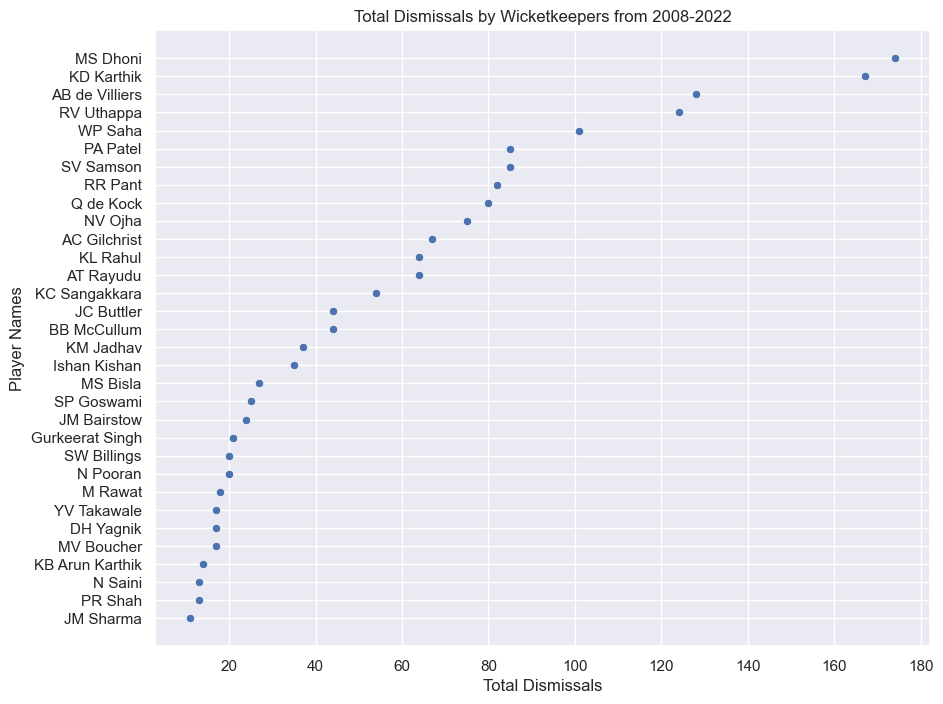

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
fws = final_wicketkeeping_stats

#GRAPHING TOTAL DISMISSALS BY ALL KEEPERS WITH MORE THAN 10 DISMISSALS
fws = fws[fws['Dismissals']>10]
fws=fws.sort_values('Dismissals', ascending=False)
fig = plt.figure(figsize=(10, 8))
sns.set_theme(style="darkgrid")
sns.set(font_scale=1)
sns.scatterplot(data=fws, x='Dismissals', y='fielders_involved')
plt.title('Total Dismissals by Wicketkeepers from 2008-2022')
plt.xlabel('Total Dismissals')
plt.ylabel('Player Names')


**We clearly see that MS Dhoni and Karthik are separate from the rest with respect to dismissals in the IPL. This paints a picture of their longevity in the sport at the highest level.**

### **#2**
Now, focussing deeper into the batting side of a wicket-keeper, it is essential for us to take into account that every wicket-keeper must be a good batsmen.\
Let's have a look.

In [4]:
keeper_batsmen_stats = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats)
keeper_batsmen_stats

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket
0,AB de Villiers,120,8,99,128,1.29,148.58,41.45
1,AC Gilchrist,51,16,45,67,1.49,133.05,27.22
3,AT Rayudu,62,2,61,64,1.05,124.15,29.51
4,BB McCullum,38,6,39,44,1.13,126.85,27.19
10,Ishan Kishan,33,2,25,35,1.40,129.50,30.16
11,JC Buttler,43,1,33,44,1.33,144.86,39.89
12,JM Bairstow,20,4,17,24,1.41,138.07,33.97
15,KC Sangakkara,45,9,37,54,1.46,118.47,24.45
16,KD Karthik,133,34,123,167,1.36,129.27,26.05
17,KL Rahul,59,5,53,64,1.21,132.80,46.37


Text(0, 0.5, 'Player Names')

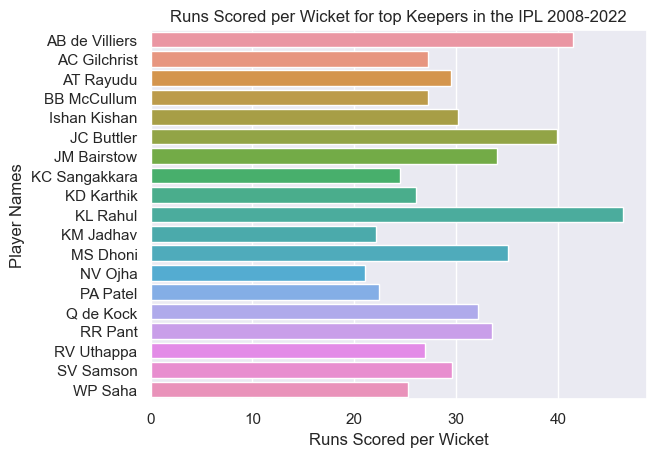

In [6]:
sns.barplot(data=keeper_batsmen_stats, x="Runs Per Wicket", y="fielders_involved")
plt.title('Runs Scored per Wicket for top Keepers in the IPL 2008-2022')
plt.xlabel('Runs Scored per Wicket')
plt.ylabel('Player Names')

Here, it is apparent that AB de Villiers and KL Rahul are clearly been the most proefficient. 

### **3**

In [ ]:
#UTILISING PROCESSED DATASETS OF BOWLERS AND BATSMEN TO CREATE A NEW MERGED DATASET OF ALL ROUNDERS
allrounder_stats = pf3.find_allrounder_stats()
allrounder_stats

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

allr = allrounder_stats
fig, ax = plt.subplots()
ax.scatter(allr['wickets_taken'], allr['Total Runs'])

for i, row in allr.iterrows():
    x, y = row['wickets_taken'], row['Total Runs']
    ax.text(float(x)+1, float(y)+0.1, row['bowler'], fontsize=10)
    
ax.set_xlabel('Wickets Taken')
ax.set_ylabel('Runs Scored')
ax.set_title('Total Wickets Taken vs. Total Runs Scored by All Rounders')

plt.show()

Here, we see that SR Watson has low wickets but high runs, whereas, DJ Bravo has the opposite. RA Jadeja remains in the middle ground.\
This plot gives us a fair understanging of the attributes of the top all rounders.
Thank you!

## **FINAL ANALYSIS**

### RESEARCH QUESTION 1
**WHO IS THE BEST WICKETKEEPER IN  IPL HISTORY?** 

To solve this, here are my steps:
1. Load, Process and Wrangle given data to get all wicketkeeper statistics
2. Get rid of Players with less than 60 innings (To ensure that players with credible longevity are considered)
3. Merge the new list of wicketkeepers with their batting statistics, as Keepers have to be good batsmen
4. Create a weighted a score to find the best Wicketkeeper

#### **LOAD DATA**

In [ ]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#### **CLEAN, PROCESS AND WRANGLE DATA**

In [11]:
#FINDING UNIQUE KEEPERS IN IPL HISTORY
unique_stumpers = pf3.find_unique_wicketkeepers(ball_by_ball)
unique_stumpers

#FINDING ALL WICKETKEEPER STATISTCS
final_wicketkeeping_stats = pf3.find_wicketkeeper_stats(ball_by_ball, unique_stumpers)
final_wicketkeeping_stats

#REMOVING ALL KEEPERS WITH LESS THAN 60 INNINGS
final_wicketkeeping_stats = final_wicketkeeping_stats[final_wicketkeeping_stats['Innings']>60]
final_wicketkeeping_stats

#FINDING AND MERGING THE BATTING STATISTICS OF THE REMAINING KEEPERS
keeper_batsmen_stats = pf3.find_and_merge_batting_stats_of_keepers(final_wicketkeeping_stats)
keeper_batsmen_stats

#CREATING WEIGHTED SCORE
df = keeper_batsmen_stats
keeper_batsmen_stats = df.assign(Weighted_Score=(df['Catches']*0.15 + df['Stumpings']*0.15 + df['Dis/Inn']*0.3 + df['Runs Per Wicket']*0.2 + df['Strike Rate']*0.2))
keeper_batsmen_stats = keeper_batsmen_stats.sort_values('Weighted_Score', ascending = False).reset_index(drop = True)
keeper_batsmen_stats

,fielders_involved,Catches,Stumpings,Innings,Dismissals,Dis/Inn,Strike Rate,Runs Per Wicket,Weighted_Score
0,MS Dhoni,135,39,127,174,1.37,130.93,35.06,59.709
1,AB de Villiers,120,8,99,128,1.29,148.58,41.45,57.593
2,KD Karthik,133,34,123,167,1.36,129.27,26.05,56.522
3,RV Uthappa,92,32,89,124,1.39,126.15,26.92,49.631
4,SV Samson,73,12,65,85,1.31,132.41,29.63,45.551
5,WP Saha,79,22,68,101,1.49,124.40,25.28,45.533
6,PA Patel,69,16,70,85,1.21,116.63,22.43,40.925
7,AT Rayudu,62,2,61,64,1.05,124.15,29.51,40.647


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('dark')
sns.barplot(data=keeper_batsmen_stats, x="Weighted_Score", y="fielders_involved", palette='rocket')
plt.title('Weighted Scores for Top Keepers in the IPL 2008-2022')
plt.xlabel('Weighted Score')
plt.ylabel('Player Names')

##### FROM THE CALCULATED WEIGHTED SCORE, WE SEE THAT **MS DHONI** IS THE BEST WICKETKEEPER IN IPL HISTORY

### RESEARCH QUESTION 2
**WHO ARE THE BEST ALLROUNDERS IN  IPL HISTORY?** 

Note: In the above research question (Wicketkeepers), I have loaded, processed and wrangled data independently. For this aspect of the research question, I will draw from the processed data my collegaues have created. I will take both their processed datasets and merge them using rudimentary techniques to achieve the desired outcome.
1. Load, Process and Wrangle given data to get all statistics
2. Processed data contains datasets of the best bowlers and batsmen in IPL.
3. Locate overlapping players and create a new dataframe withthem.
4. Create a weighted a score to find the best All Rounders

#### **LOAD DATA**

In [ ]:
import numpy as np
import pandas as pd
from codes import project_functions3 as pf3

ball_by_ball = pf3.load_and_process("../data/raw/IPL_Ball_by_Ball_2008_2022.csv")
matches = pf3.load_and_process("../data/raw/IPL_Matches_2008_2022 (1).csv")

#### **CLEAN, PROCESS AND WRANGLE DATA**

In [ ]:
#UTILISING PROCESSED DATASETS OF BOWLERS AND BATSMEN TO CREATE A NEW MERGED DATASET OF ALL ROUNDERS
allrounder_stats = pf3.find_allrounder_stats()

#CREATING WEIGHTED SCORE
df = allrounder_stats
allrounder_stats = df.assign(Weighted_Score_Batting=(df['Runs Given per Wicket']*0.15+ df['Runs Scored']*0.025 + df['Economy Rate']*0.15 + df['Strike Rate']*0.20 + df['Runs scored per wicket']*0.20 + df['Matches']*0.05)
                            ,Weighted_Score_Bowling=(df['Runs Given per Wicket']*0.2 + df['Economy Rate']*0.2 + df['Strike Rate']*0.15 + df['Runs scored per wicket']*0.15 + df['Wickets Taken']*0.25+ df['Matches']*0.05)).round(2)
allrounder_stats

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

sns.set_style('dark')
fig, axes = plt.subplots(ncols=2, figsize=(10, 5))
sns.barplot(x='Weighted_Score_Batting', y='bowler', data=allrounder_stats.sort_values('Weighted_Score_Batting'), ax=axes[0], palette = 'rocket')
sns.barplot(x='Weighted_Score_Bowling', y='bowler', data=allrounder_stats.sort_values('Weighted_Score_Bowling'), ax=axes[1], palette = 'rocket')

axes[0].set_title('Batting Favoured Weighted Score')
axes[1].set_title('Bowling Favoured Weighted Score')
axes[0].set_ylabel('Player Name')
axes[1].set_ylabel('Player Name')
axes[0].set_xlabel('Weighted Score')
axes[1].set_xlabel('Weighted Score')

plt.tight_layout()
sns.despine()
plt.show()

##### FROM THE CALCULATED WEIGHTED SCORE, WE SEE THAT 
##### **SR WATSON** IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY
##### **DJ BRAVO** IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY

### **FINAL RESULT**

**RESEARCH QUESTION 1** \
WHO IS THE BEST WICKETKEEPER IN  IPL HISTORY?  \
***MS DHONI***


**RESEARCH QUESTION 2** 

*WHO IS THE BEST BATTING FAVOURED ALL-ROUNDER IN IPL HISTORY?*  \
***SR WATSON*** \
*WHO IS THE BEST BOWLING FAVOURED ALL-ROUNDER IN IPL HISTORY?*  \
***DJ BRAVO***